In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse
import pyranges as pr

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Alter abundance file / GTF to add a new novelty category

In [6]:
df = pd.read_csv('human_talon_abundance_filtered.corrected.tsv', sep='\t')
df.loc[(df.annot_transcript_id.str.contains('#'))&(df.transcript_novelty=='ISM'), 'transcript_novelty'] = 'ISM_rescue'
df.to_csv('human_talon_abundance_filtered.corrected.tsv', sep='\t', index=False)

In [41]:
gtf = pr.read_gtf('human_talon.corrected.gtf').df
gtf.loc[(gtf.transcript_id.str.contains('#'))&(df.transcript_novelty=='ISM'), 'transcript_novelty'] = 'ISM_rescue'
gtf = pr.PyRanges(gtf)
gtf.to_gtf('human_talon.corrected.gtf')

## Create a GTF with just polyA, complete, detected transcripts

In [3]:
df = pd.read_csv('human_talon_abundance_filtered.corrected.tsv', sep='\t')
_, inds = get_tpm_table(df, 
                        how='iso', 
                        sample='all', 
                        min_tpm=1,
                        gene_subset='polya',
                        nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])

Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC', 'ISM_rescue']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1094: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1093: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 507200
# isos >= 1 tpm: 430773
Applying gene type and novelty subset
Number of isos reported: 336969


In [4]:
tids = inds
df = df.loc[df.annot_transcript_id.isin(inds)]
gids = df.annot_gene_id.unique().tolist()

In [5]:
df = df.loc[df.annot_transcript_id.isin(inds)]
df = df[['gene_ID', 'transcript_ID']]
df.to_csv('human_talon_swan_pass_list.csv', header=None, index=False)

In [6]:
gtf = pr.read_gtf('human_talon.corrected.gtf')

In [7]:
gtf = gtf.df

# limit to relevant genes
gtf = gtf.loc[gtf.gene_id.isin(gids)]

# limit to relevant transcripts
gtf = gtf.loc[gtf.transcript_id.isin(tids)]

In [8]:
fname = 'human_swan_talon.corrected.gtf'
gtf = pr.PyRanges(gtf)
gtf.to_gtf(fname)

## Create SwanGraph

In [13]:
annot = '../../refs/gencode_v29_sirv4_ercc.gtf'
ab = 'human_talon_abundance_filtered.corrected.tsv'
gtf = 'human_swan_talon.corrected.gtf'

In [14]:
sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf)
sg.save_graph('swan')
sg.add_abundance(ab)


Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph
Saving graph as swan.p

Adding abundance for datasets gm12878_1_1, gm12878_1_2, gm12878_1_3, gm12878_1_4, gm12878_3_1... (and 133 more) to SwanGraph
Calculating transcript TPM...
Calculating PI...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:408: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating edge usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py:459: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:408: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating TES usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py:459: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:408: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [15]:
sg.save_graph('swan')

Saving graph as swan.p


## Get metadata

In [16]:
sg = swan.read('swan.p')
meta = sg.adata.obs.copy(deep=True)
meta.reset_index(inplace=True, drop=True)
meta['sample'] = meta.dataset.str.rsplit('_', n=2, expand=True)[0]

tissue_df = get_tissue_metadata()
tissue_df = tissue_df[['tissue', 'biosample']]
tissue_df.rename({'biosample': 'sample'}, axis=1, inplace=True)

meta = meta.merge(tissue_df, how='left', on='sample')
meta.head()
meta['classification'] = 'tissue'
meta.loc[meta.tissue.isnull(), 'classification'] = 'cell_line'

meta.loc[meta.tissue.isnull(), 'tissue'] = meta.loc[meta.tissue.isnull(), 'sample']
meta.drop('sample', axis=1, inplace=True)
meta.rename({'tissue': 'sample'}, axis=1, inplace=True)

ad_df = get_ad_metadata()
ad_df = ad_df[['health_status', 'hr']]
meta = meta.merge(ad_df, how='left', left_on='dataset', right_on='hr')
meta.drop('hr', axis=1, inplace=True)

print('Found {} total samples'.format(len(meta['sample'].unique().tolist())))

Read in graph from swan.p
Found 50 total samples


In [17]:
meta.to_csv('swan_metadata.tsv', sep='\t', index=False)

## Add metadata 

In [18]:
sg = swan.read('swan.p')

meta = 'swan_metadata.tsv'
sg.add_metadata('swan_metadata.tsv')

# colors
c_dict, order = get_biosample_colors()
sg.set_metadata_colors('sample', c_dict)

c_dict, order = get_ad_colors()
sg.set_metadata_colors('health_status', c_dict)

sg.save_graph('swan')

Read in graph from swan.p
Saving graph as swan.p


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


## Make BED file for called regions

In [2]:
sg = swan.read('swan.p')
df = pd.read_csv('human_talon_abundance_filtered.corrected.tsv', sep='\t')

# get references for computing triplets
t_df, regions, counts = get_ref_triplets(sg,
                                         df, 
                                         first_sd=False,
                                         nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])

for key, item in regions.items():
    item['score'] = '.'
    bed = item[['Chromosome', 'Start', 'End', 'gid', 'score', 'strand']]
    bed.reset_index(drop=True)
    print(bed.loc[bed.End == 827721])
    print(len(bed.index))
    bed = bed.drop_duplicates()
    print(len(bed.index))
    bed.to_csv('{}_regions.bed'.format(key), index=False, header=None, sep='\t')

Read in graph from swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC', 'ISM_rescue']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1099: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1098: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 507200
# isos >= 1 tpm: 430773
Applying gene type and novelty subset
Number of isos reported: 336969
     Chromosome   Start     End                gid score strand
9300       chr1  827608  827721  ENSG00000228794.8     .      +
170288
169693
Empty DataFrame
Columns: [Chromosome, Start, End, gid, score, strand]
Index: []
160538
160538


## Intron chain, TSS, TES triplet analysis

In [3]:
sg = swan.read('swan.p')
df = pd.read_csv('human_talon_abundance_filtered.corrected.tsv', sep='\t')

# get references for computing triplets
t_df, regions, counts = get_ref_triplets(sg,
                                         df,
                                         nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])

# add numbers for observed
temp = get_subset_triplets(t_df, 
                    df,
                    min_tpm=1,
                    groupby='all',
                    source_name='obs',
                    nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])         
counts = pd.concat([counts, temp])

# add numbers for obs+GENCODE
temp = get_subset_triplets(t_df,
                           source_name='all',
                           nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])
counts = pd.concat([counts, temp])

# add numbers for each library
temp = get_subset_triplets(t_df, 
                    df,
                    min_tpm=1,
                    groupby='sample',
                    nov=['Known', 'NIC', 'NNC', 'ISM_rescue']) 
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=0, 
                         gene_subset='polya',
                         groupby='sample',
                         nov=['Known', 'NIC', 'NNC', 'ISM_rescue'])
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC', 'ISM_rescue']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1099: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1098: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 507200
# isos >= 1 tpm: 430773
Applying gene type and novelty subset
Number of isos reported: 336969
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC', 'ISM_rescue']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 507200
# isos >= 1 tpm: 430773
Applying gene type and novelty subset
Number of isos reported: 336969
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC', 'ISM_rescue']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 507200
# isos >= 1 tpm: 430773
Applying gene type and novelty subset
Number of isos reported: 336969
Found 50 total samples
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Applying gene type and novelty subset
Averaging over biosample
Found 50 total samples
Number of genes reported: 39981


In [4]:
temp = t_df.loc[t_df.ttrip.duplicated(keep=False)].copy(deep=True)
temp = temp.sort_values(by='ttrip')
n = len(temp.ttrip.unique().tolist())
print('Found {} transcripts w/ duplicated triplets'.format(n))
print(temp.head())

Found 40035 transcripts w/ duplicated triplets
                    tname                 gid gname  \
125445            A2M-201  ENSG00000175899.14   A2M   
125444            A2M-201  ENSG00000175899.14   A2M   
17232   ENCODEHT000436514  ENSG00000175899.14   A2M   
17233   ENCODEHT000436514  ENSG00000175899.14   A2M   
326727           AAAS-220  ENSG00000094914.12  AAAS   

                                                     path  \
125445  [985145, 555606, 555607, 555608, 555609, 55561...   
125444  [555605, 555606, 555607, 555608, 555609, 55561...   
17232   [555685, 555606, 555607, 555608, 555609, 55561...   
17233   [985145, 555606, 555607, 555608, 555609, 55561...   
326727  [572393, 572365, 572366, 572367, 572368, 57236...   

                         tid  \
125445  ENST00000318602.11#0   
125444    ENST00000318602.11   
17232      ENCODEHT000436514   
17233    ENCODEHT000436514#0   
326727     ENST00000552876.5   

                                                 loc_path  ann

In [5]:
def check_gene(df, counts, gname):
    print(t_df.loc[t_df.gname == gname, 'tss_gene_num'].max())
    print(t_df.loc[t_df.gname == gname, 'tes_gene_num'].max())
    print(t_df.loc[t_df.gname == gname, 'intron_chain_gene_num'].max())
    print()
    print(len(t_df.loc[t_df.gname == gname, 'tss_cluster'].unique().tolist()))
    print(len(t_df.loc[t_df.gname == gname, 'tes_cluster'].unique().tolist()))
    print(len(t_df.loc[t_df.gname == gname, 'intron_chain'].unique().tolist()))
    print()
    print(counts.loc[(counts.gname == gname)&(counts.source=='all')])

In [6]:
check_gene(t_df, counts, 'COL1A1')
check_gene(t_df, counts, 'ELN')

13
12
13

13
12
13

       tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
88075   13            13   12          14            1.04    all   

                      gid   gname         biotype biotype_category     tf  \
88075  ENSG00000108821.13  COL1A1  protein_coding   protein_coding  False   

      biosample  tpm  
88075       NaN  NaN  
9
13
158

9
13
158

       tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
85148    9           158   13         304       14.363636    all   

                      gid gname         biotype biotype_category     tf  \
85148  ENSG00000049540.16   ELN  protein_coding   protein_coding  False   

      biosample  tpm  
85148       NaN  NaN  


In [7]:
# save all observed triplets
temp = counts.loc[counts.source == 'obs']
temp.to_csv('obs_triplets.tsv', sep='\t', index=False)

In [8]:
# save triplets
counts.to_csv('triplets.tsv', sep='\t', index=False)

## Plotting

In [9]:
c_dict, order = get_biosample_colors()
c_dict['GENCODE'] = 'k'
c_dict['obs'] = 'k'
counts = pd.read_csv('triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


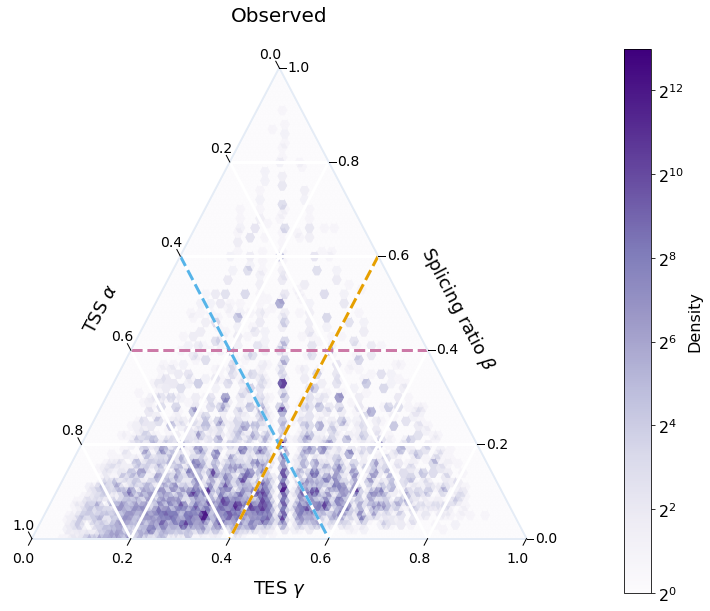

In [10]:
# observed
temp = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'obs'},
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            sect_alpha=0.4,
            sect_beta=0.4,
            sect_gamma=0.4,
            scatter=False,
            title='Observed',
            opref='figures/human')

[100, 100, array([104.31683908]), array([124.62511172]), array([26.08989267])]


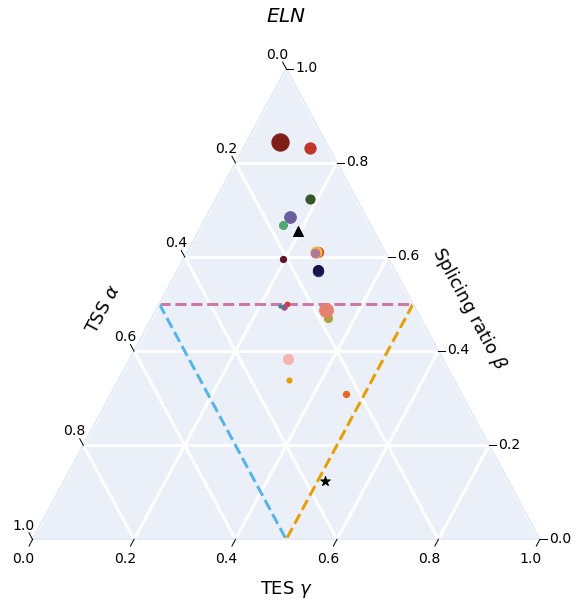

In [12]:
# ELN
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([201.19109322]), array([223.92923021]), array([251.04657318])]


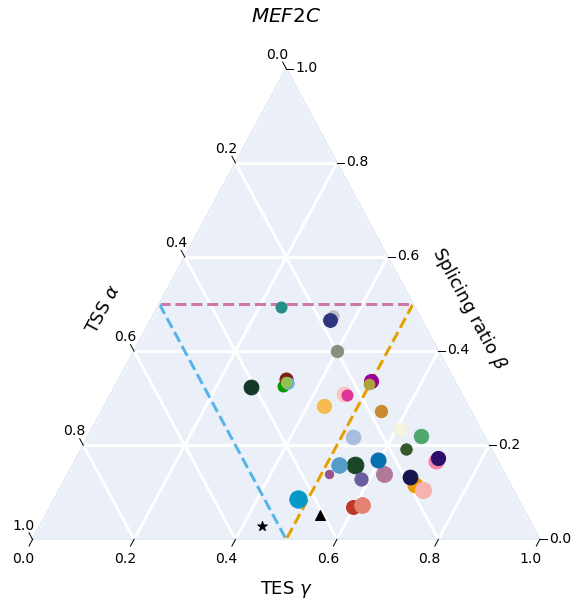

In [13]:
# MEF2C
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([210.26375515]), array([202.68817632]), array([174.83256468])]


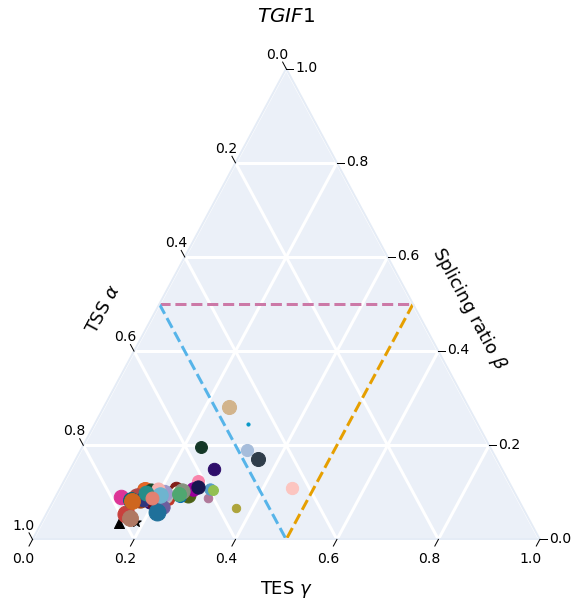

In [14]:
# TGIF1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TGIF1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([109.61710158]), array([140.8229839]), array([136.38606785])]


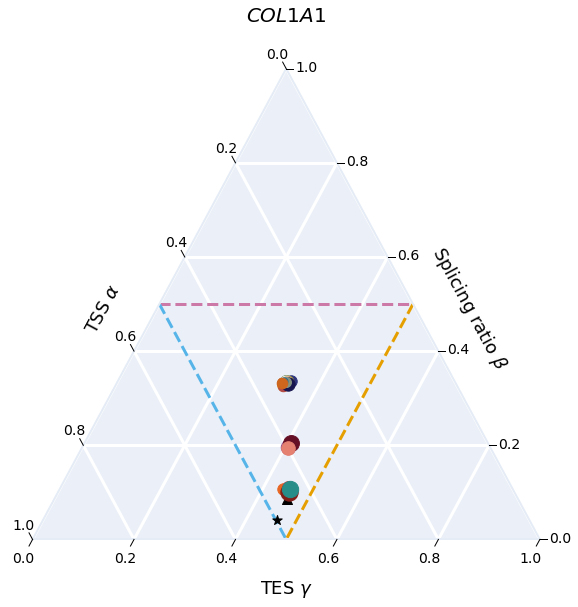

In [15]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([96.53528646]), array([128.52714996]), array([132.26811929])]


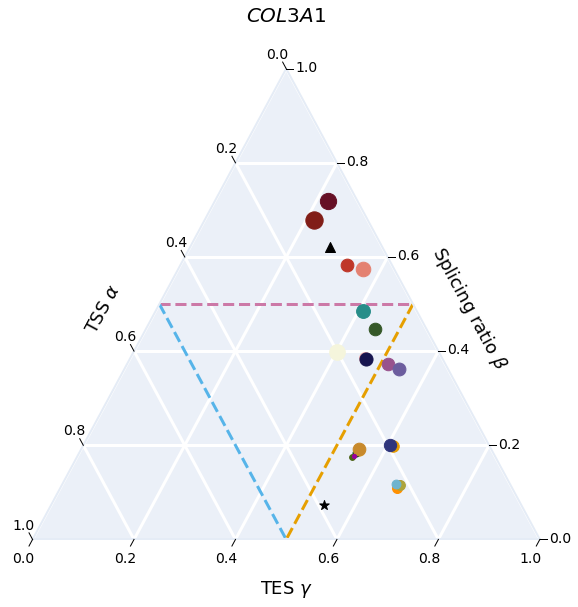

In [16]:
# COL3A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

In [17]:
def count_gisx_region_genes(df, source, tss, tes, spl, iso):
# def count_gisx_region_genes(df, source, tss, tes, spl):
    df = df.loc[df.source == source].copy(deep=True)
    df['total'] = df.tss+df.tes+df.splicing_ratio
    df['tss_ratio'] = df.tss / df.total
    df['tes_ratio'] = df.tes / df.total
    df['spl_ratio'] = df.splicing_ratio / df.total
    
    print('TSS threshold: {}; TES threshold: {}; splicing ratio threshold: {}; iso threshold: {}'.format(tss, tes, spl, iso))
    
    t = len(df.index)
    print('{} genes are in {}'.format(t, source))
    
    # tss-high
    n = len(df.loc[df.tss_ratio > tss].index)
    print('{} ({:.2f}%) genes are TSS-high in {}'.format(n, (n/t)*100, source))
    
    # tes-high
    n = len(df.loc[df.tes_ratio > tes].index)
    print('{} ({:.2f}%) genes are TES-high in {}'.format(n, (n/t)*100, source))
    
    # splicing-high
    n = len(df.loc[df.spl_ratio > spl].index)
    print('{} ({:.2f}%) genes are splicing-high in {}'.format(n, (n/t)*100, source))
    
    # tss / tes high
    n = len(df.loc[(df.tss_ratio > tss)&(df.tes_ratio > tes)].index)
    print('{} ({:.2f}%) genes are TSS/TES-high in {}'.format(n, (n/t)*100, source))
    
    # tss / splicing high
    n = len(df.loc[(df.tss_ratio > tss)&(df.spl_ratio > spl)].index)
    print('{} ({:.2f}%) genes are TSS/splicing-high in {}'.format(n, (n/t)*100, source))
    
    # tes / splicing high
    n = len(df.loc[(df.spl_ratio > spl)&(df.tes_ratio > tes)].index)
    print('{} ({:.2f}%) genes are TES/splicing-high in {}'.format(n, (n/t)*100, source))
    
    # simple genes
    n = len(df.loc[(df.tss_ratio <= tss)&(df.tes_ratio <= tes)&(df.spl_ratio <= spl)&(df.tss_ic_tes <= iso)].index)
    # n = len(df.loc[(df.tss_ratio <= tss)&(df.tes_ratio <= tes)&(df.spl_ratio <= spl)].index)    
    print('{} ({:.2f}%) genes are simple in {}'.format(n, (n/t)*100, source))
    
    # mixed genes
    n = len(df.loc[(df.tss_ratio <= tss)&(df.tes_ratio <= tes)&(df.spl_ratio <= spl)&(df.tss_ic_tes > iso)].index)
    print('{} ({:.2f}%) genes are mixed in {}'.format(n, (n/t)*100, source))

In [18]:
counts = pd.read_csv('triplets.tsv', sep='\t')

# observed, .4
count_gisx_region_genes(counts, 'obs', .4, .4, .4, 1)
print()


TSS threshold: 0.4; TES threshold: 0.4; splicing ratio threshold: 0.4; iso threshold: 1
25704 genes are in obs
10651 (41.44%) genes are TSS-high in obs
7509 (29.21%) genes are TES-high in obs
857 (3.33%) genes are splicing-high in obs
2717 (10.57%) genes are TSS/TES-high in obs
44 (0.17%) genes are TSS/splicing-high in obs
24 (0.09%) genes are TES/splicing-high in obs
7983 (31.06%) genes are simple in obs
1489 (5.79%) genes are mixed in obs



/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 90% set